#### Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
!pip install tensorflow

In [2]:
#
# Your code to import matplotlib, pandas and numpy libraries
#

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Following code loads the CIFAR 10 datset.

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
#
# Your code to print shapes of training and test data. Check how the data looks
#

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
# Your code to print the shape of one image.
x_train[0].shape

(32, 32, 3)

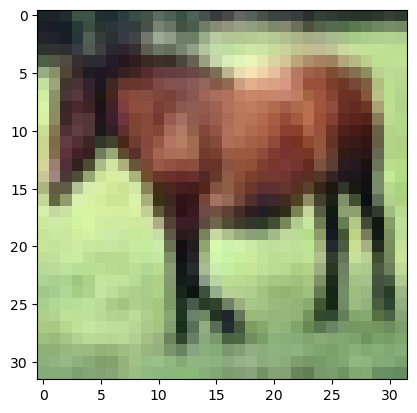

In [6]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.imshow(x_train[7])

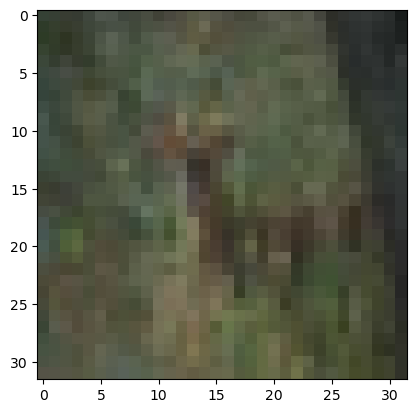

In [7]:
# Show any other image
plt.imshow(x_train[10])

# PreProcessing

In [8]:
# Your code to print one image in digitals. Check how pixels look like. 

print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [9]:
# Your code to print shape of any image i.e particular value in the x_train
print(x_train[7].shape)

(32, 32, 3)


In [10]:
# Your code to print the maximum value in x_train. Hint - Use .max()
print(x_train.max())

255


In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
# Print the shape of x_train again.
print(x_train.shape)

(50000, 32, 32, 3)


In [13]:
# Print the shape of y_train again.
print(y_train.shape)

(50000, 1)


# One hot vector encoding.
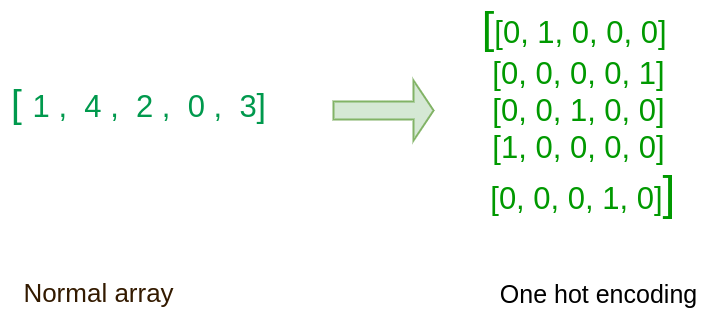


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [14]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train

print(y_train[0].shape)
y_cat_train = to_categorical(y_train)
print(y_cat_train)

(1,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [15]:
# Your code to print shape of the array y_cat_train
print(y_cat_train.shape)

(50000, 10)


In [16]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.

# Compare the result for better understanding of "to_categorical()"
print(y_cat_train[7], y_train[7])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [7]


In [17]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test

# Print the shapes to look how y_cat_test looks.

y_cat_test = to_categorical(y_test, 10)
print(y_cat_test)
print(y_cat_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(10000, 10)


----------
# Building the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [19]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
#

# model.add(Conv2D(filters = 32, kernel_size = (2, 2), strides = (1, 1), activation = 'softmax'))
# model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 28, kernel_size = (4, 4), strides = (1, 1), activation = 'sigmoid'))
model.add(MaxPool2D(pool_size = (2, 2)))


model.add(Flatten())

#
# Add few dense layers. 
#

model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))





In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 28)        14364     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 28)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 700)               0         
                                                                 
 dense (Dense)               (None, 200)               1

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [22]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])



In [23]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch

history = model.fit(x_train, y_cat_train, validation_data = (x_test, y_cat_test), batch_size = 32, epochs = 10, callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 23s 13ms/step - loss: 1.7621 - accuracy: 0.3415 - val_loss: 1.5153 - val_accuracy: 0.4407
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4321 - accuracy: 0.4771 - val_loss: 1.3422 - val_accuracy: 0.5111
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3056 - accuracy: 0.5280 - val_loss: 1.2723 - val_accuracy: 0.5401
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1965 - accuracy: 0.5697 - val_loss: 1.1868 - val_accuracy: 0.5695
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1115 - accuracy: 0.6028 - val_loss: 1.1060 - val_accuracy: 0.6022
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0456 - accuracy: 0.6274 - val_loss: 1.0814 - val_accuracy: 0.6134
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9988 - accuracy: 0.6448 - val_loss: 1.0643 -

### We can save the model in a file. Following code shows how to do this.

In [24]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [25]:
losses = pd.DataFrame(model.history.history)

In [26]:
# Print first few rows of losses.
history = model.fit(x_train, y_cat_train, epochs=5, batch_size=32, validation_data=(x_test, y_cat_test))
training_parameters = history.history
print("First few rows of losses:")
print(history.history['loss'][:5])

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8323 - accuracy: 0.7049 - val_loss: 1.0038 - val_accuracy: 0.6567
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8037 - accuracy: 0.7171 - val_loss: 0.9783 - val_accuracy: 0.6578
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7675 - accuracy: 0.7295 - val_loss: 1.0082 - val_accuracy: 0.6592
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7451 - accuracy: 0.7356 - val_loss: 1.0056 - val_accuracy: 0.6621
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7149 - accuracy: 0.7481 - val_loss: 1.0065 - val_accuracy: 0.6566
First few rows of losses:
[0.8323296308517456, 0.8037049174308777, 0.7674645185470581, 0.745122492313385, 0.7148793935775757]


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





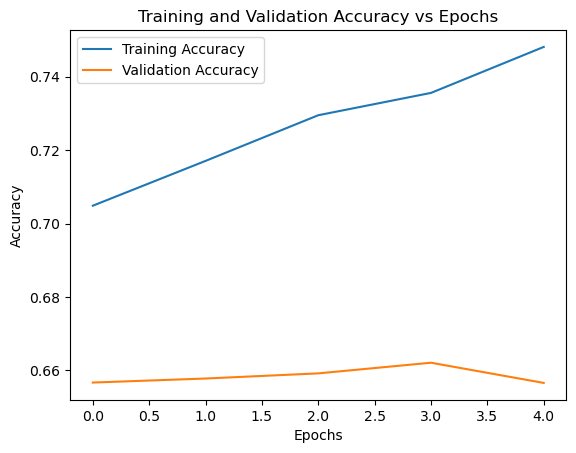

In [27]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
#

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()

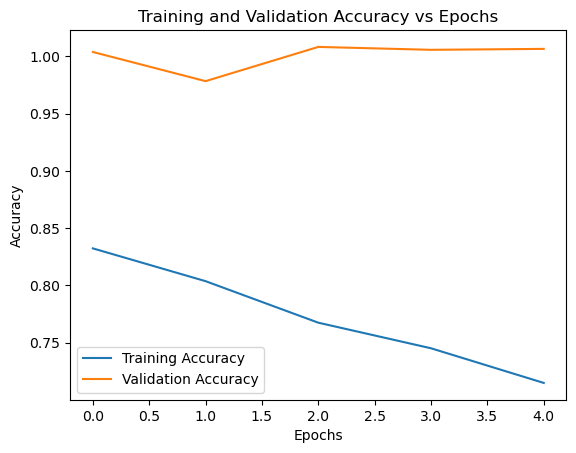

In [28]:
# 
# Your code to plot loss and val_loss vs the epochs
#
plt.plot(history.history['loss'], label = 'Training Accuracy')
plt.plot(history.history['val_loss'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [29]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [30]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0064668655395508, 0.6565999984741211]

### Make a prediction on test data set.   

In [31]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 1s 4ms/step


### We could get the full classification report. 

In [32]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report

In [33]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.71      0.70      0.71      1000\n           1       0.84      0.71      0.77      1000\n           2       0.67      0.41      0.51      1000\n           3       0.41      0.57      0.48      1000\n           4       0.53      0.73      0.61      1000\n           5       0.61      0.50      0.55      1000\n           6       0.78      0.67      0.72      1000\n           7       0.78      0.68      0.73      1000\n           8       0.75      0.78      0.77      1000\n           9       0.67      0.82      0.74      1000\n\n    accuracy                           0.66     10000\n   macro avg       0.68      0.66      0.66     10000\nweighted avg       0.68      0.66      0.66     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [34]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,predictions)

array([[701,  25,  29,  39,  44,   5,   7,   9,  86,  55],
       [ 27, 707,   6,  21,  12,   4,  13,   3,  45, 162],
       [ 73,   5, 407, 131, 187,  78,  44,  30,  19,  26],
       [ 19,   5,  39, 573, 110, 137,  42,  20,  24,  31],
       [ 18,   1,  42,  75, 726,  26,  35,  51,  20,   6],
       [ 10,   3,  25, 283,  78, 500,  23,  54,   9,  15],
       [  7,   5,  33, 135,  87,  14, 668,   7,  15,  29],
       [ 22,   3,  13,  71, 110,  52,   8, 682,   3,  36],
       [ 80,  38,   5,  28,  13,   3,   4,   3, 783,  43],
       [ 30,  48,   8,  25,   7,   5,   7,  12,  39, 819]], dtype=int64)

<Axes: >

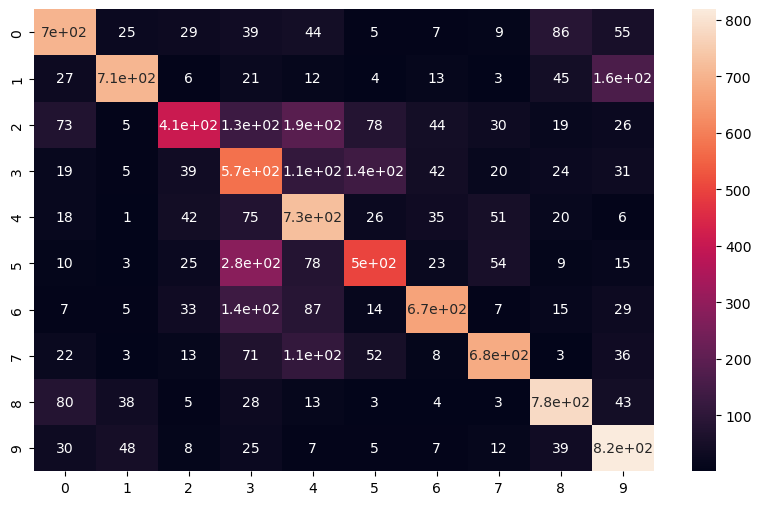

In [36]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [37]:
my_image = x_test[16]

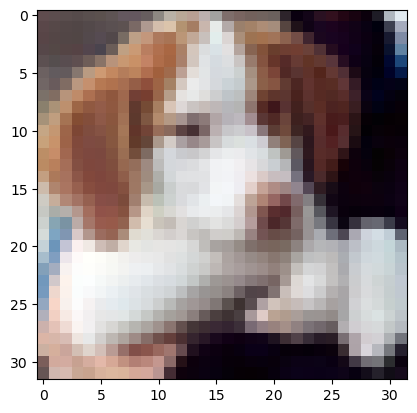

In [38]:
plt.imshow(my_image)

In [39]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 105ms/step


array([[0.00099029, 0.00170168, 0.02465097, 0.13377632, 0.00109217,
        0.7784045 , 0.00329241, 0.04768219, 0.00209177, 0.00631778]],
      dtype=float32)

In [40]:
# Find the highest probability value in the vector above. 
# What output value does it point to?

In [41]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 20ms/step


array([5], dtype=int64)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

In [42]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

NameError: name 'random' is not defined

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [ ]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 